# Intro to Numpy 
Numpy (which stands for numerical Python) is one of Python's most vital libraries for data science.  It's key data format is the array (ndarray), which is useful for numerical and scientific computational tasks.  The ndarray is a multidimensional array which provides fast array-oriented arithmetic operations (without having to write loops).  Computations performed this way are called vectorized.  This results in concise code that is easy to read, as well as speed compared to element-by-element computation.


Having familiarity with array-oriented semantics will help us use future tools (like pandas) more effectively.  Numpy is the foundation for nearly all numerical libraries for Python. 

The main areas of functionality we will focus on are
- fast vectorized array operations for data munging and cleaning, subsetting, filtering, and transforming
- common array algorithms such as sorting, unique and set operations
- using descriptive statistics and aggregating/summarizing data
- group-wise data manipultions

Numpy also has statistical functions, random number functions, a linear algebra library, and other functionality.

### ndarray
The N-dimensional array (ndarray) is the key object in Numpy, and the main data structure.  It is a fast, flexible "container" for large data numerical sets where all entries are of the same type ("homogenous" data).  The data structure also contains important metadata about the array (such as its shape, size, data type).

Its beauty resides in the ability to perform mathematical operations on whole blocks of data using similar syntax to what we use for scalar operations.  Arrays are of fixed size (they cannot be resized without creating a new array).

### Broadcasting
Another trait which is extremely convenient in Numpy is **broadcasting**.  The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. 



In [108]:
import numpy as np

### Creating arrays explicitly
We can explictily generate small arrays using the np.array function.  The function takes a nested list where each element in the outer list contains the entries for a row in the array.  For larger arrays, it would be tedious to enter data by hand.

In [84]:
data = np.array([[1, 2], [3, 4], [5, 6]]) # create an array with 3 rows and 2 columns by using nested list
data
type(data) # numpy.ndarray
data.ndim # number of dimensions/axes
data.shape # number of rows, then number of columns
data.size # number of elements-- always the product of number of rows * number of columns

6

### Task
Create an array \begin{bmatrix}
1 & 6 & 3\\
0 & 2 & 1
\end{bmatrix}
and determine the number of dimensions, the shape, and the size.

### Solution

In [86]:
data = np.array([[1, 6, 3], [0, 2, 1]]) # create an array with 3 rows and 2 columns by using nested list
data
type(data) # numpy.ndarray
data.ndim # number of dimensions/axes
data.shape # number of rows, then number of columns
data.size # number of elements-- always the product of number of rows * number of columns

(2, 3)

### Creating arrays that follow specific rules
Numpy has a number of built in functions to create arrays of a specific type
- np.zeros((3, 4)) creates an array of size 3 x 4 with all zeros
- np.ones((3, 4)) creates an array of size 3 x 4 with all ones (this could be multipled by a scalar to create an array of all constants)
- np.full((3, 4), 8) creates a 3 x 4 array with 8 in each entry
- np.eye(5) creates a 5 x 5 array with ones on the diagonal and zeros elsewhere (the identity matrix)
- np.linspace(0, 100, 6) creates an array of 6 evenly divided values between 0 and 100
- np.arange(0, 10, 3) creates an array of values from 0 up to but not including 10 with step size of 3

Numpy also has a number of functions which create arrays of random numbers.  This is especially useful for simulation (e.g., Monte Carlo).  See the $\pi$ estimation example below.

### Task
Create the following:
- a 2 x 3 matrix filled with the number 7
- a 4 x 4 identity matrix (ones on the diagonal and zeros everywhere else)
- a one-dimensional array with 5 numbers total which are evenly spaced and with first entry a 2 and last entry a 3
- a one-dimensional array with the numbers 0, 1, 2
- a 4 x 4 array with the numbers 0, 5, 10, 15 on the diagonal and zeros elsewhere
Feel free to use online documentation.  When possible, if there are multiple ways to create the same array, demonstrate several.

In [116]:
# option 1
A =  7 * np.ones((2, 3))
A
# option 2
A = np.full((2, 3), 7)
A

array([[7, 7, 7],
       [7, 7, 7]])

In [115]:
B = np.eye((4))
B

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [117]:
C = np.linspace(2.0, 3.0, num = 5)
C

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [120]:
# option 1
D = np.arange(3)
D
# option 2
D = np.array([0, 1, 2])
D
# option 3
D = np.linspace(0, 2, num = 3)
D

array([0., 1., 2.])

In [125]:
# option 1
E = np.diag(np.arange(0, 20, 5))
E
# option 2
E = np.array([[0, 0, 0, 0], [0, 5, 0, 0], [0, 0, 10, 0], [0, 0, 0, 15]])
E
# option 3 (broadcasting)
E = np.array([0, 5, 10, 15]) * np.eye(4)
E

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.],
       [ 0.,  0., 10.,  0.],
       [ 0.,  0.,  0., 15.]])

### Indexing and Slicing
Elements and subarrays of NumPy arrays are accessed using the standard square bracket notation that is also used with Python lists.  In general, the expression in the bracket is a tuple where each item in the tuple is a specifiction of which elements to access from each axis (dimension) of the array.

Subarrays extracted from arrays using slicing and indexing are alternative views of the same underlying array data (they are arrays that refer to the same data in the memory as the original array).  If elements in views are assigned new values, the values of the original array are updated.  Be aware of this.

If you would prefer to have a copy rather than a view (so you don't overwrite original data), you can use the copy() method.  Then changes to the copy do not affect the original array.


In [131]:
# 1 dimensional example
a = np.arange(0, 11)
a
# select the first element
a[0]
# select the last last
a[-1]
# select the 5th element, at index 4
a[4]
# select the second to the second to last elements
a[1:-1]
# select first 5 elements
a[:5]
#select last 5 elements
a[-5:]
# reverse the array and select every second value
a[:: -2]

array([10,  8,  6,  4,  2,  0])

### Task
- create a one dimensional array with 5 evenly spaced entries starting at 2 and ending at 14
- select the third element
- select the second to last element
- select the second to the last element
- reverse the array

### Solution

In [139]:
b = np.linspace(2, 14, 5)
b
b[2]
b[-2]
b[1:]
b[:: -1]

array([14., 11.,  8.,  5.,  2.])

### Extracting Columns, Rows, and Subarrays

In [143]:
# lambda function we will use to populate entries as column number + 10 times row number
f = lambda m, n: n + 10 * m
A = np.fromfunction(f, (6,6), dtype = int) # documentation here: https://numpy.org/doc/stable/reference/generated/numpy.fromfunction.html
A

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [144]:
# extract second column
A[:, 1]

array([ 1, 11, 21, 31, 41, 51])

In [145]:
# extract 3rd row
A[2, :]

array([20, 21, 22, 23, 24, 25])

In [146]:
# extract upper diagonal left quadrant
A[:3, :3] 

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [147]:
# extract subarray with every second element
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Task 
- create an array \begin{bmatrix}
1 & 2 & 3 & 4 & 5\\
6 & 7 & 8 & 9 & 10\\
11 & 12 & 13 & 14 & 15
\end{bmatrix}
- make a copy of this array
- in the copy, replace the element in the first row and column ($1$) with the number $27$
- extract the subarray created by taking every other element in the second and third rows
- verify that the original array has not been altered

### Solution

In [151]:
# create array
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]])
# create copy
arr2 = arr.copy()
arr2

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [152]:
# replace 1 with 27
arr2[0, 0] = 27
arr2

array([[27,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [155]:
print(arr2[1:3, ::2])

[[ 6  8 10]
 [11 13 15]]


In [156]:
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

### Fancy and Boolean Valued Indexing
Fancy indexing allows us to index an array with another NumPy array or a Python list.  We can also index with boolean values.
In these instances, the array returned is not a view but a new, independent array.

In [160]:
# create 1d array
A = np.linspace(0, 1, 11) # array with 11 elements evenly spaced between 0 and 1, inclusive
# take the 
A[np.array([1, 3, 7])] # create a one dimensional array with elements 1, 3, 7 and use this to index values


array([0.1, 0.3, 0.7])

In [161]:
# we can accomplish the same thing by indexing with a Python list
A[[1, 3, 7]]

array([0.1, 0.3, 0.7])

In [162]:
# we can also index using a Boolean-valued index array
# extract all values in the original array which are > .5
A[A > .5]
# note: A > .5 returns an array with boolean values true and false

array([0.6, 0.7, 0.8, 0.9, 1. ])

### Task
Create the following one-dimenstional array $[3,4,6,10,24,89,45,43,46,99,100]$ and use Boolean masking to extract all the numbers which are
- not divisible by 3
- which are divisible by 5
- which are divisible by 3 and by 5
- which are divisible by 3, and then reset these values in the original array to 42.

### Solution


In [163]:
A = np.array([3,4,6,10,24,89,45,43,46,99,100])
div3 = A[A%3!=0]
print("Elements of A not divisible by 3:")
print(div3)

Elements of A not divisible by 3:
[  4  10  89  43  46 100]


In [164]:
div5 = A[A%5==0]
print("Elements of A divisible by 5:")
print(div5)

Elements of A divisible by 5:
[ 10  45 100]


In [166]:
print("Elements of A, which are divisible by 3 and 5:")
print(A[(A%3==0) & (A%5==0)])


Elements of A, which are divisible by 3 and 5:
[45]


In [167]:
A[A%3==0] = 42
print("""New values of A after setting the elements of A, 
which are divisible by 3, to 42:""")
print(A)

New values of A after setting the elements of A, 
which are divisible by 3, to 42:
[ 42   4  42  10  42  89  42  43  46  42 100]


### Reshaping and Resizing Arrays
When working with data in arrays, it can be useful to rearrange the arrays and alter the way they are interpreted.  For example, an $N \times N$ array can be rearranged into a vector of length $N^2$ or several vectors can be concatenated into a longer vector or stacked into a matrix.  Reshaping an area does not modify the underlying array data, and produces a view of the area (if a copy is needed, use np.copy()).  It is necessary that the requested new shape match the number of elements in the original array.
The ravel() function is a special case of reshape which returns a flattened one dimensional array.
The functions vstack() and hstack() allows the joining of arrays either vertically or horizontally.

In [176]:
# reshpaes with function reshape()
data = np.array([[1, 2], [3, 4]]) # 2 x 2 array
np.reshape(data, (1, 4)) # reshapes into a 1 x 4 vector

array([[1, 2, 3, 4]])

In [177]:
# reshapes with method reshape()
data = np.array([[1, 2], [3, 4]]) # 2 x 2 array
data.reshape(4) # reshapes into a 1 x 4 vector

array([1, 2, 3, 4])

In [200]:
# reshaping
A = np.array([1, 2, 3, 4, 5, 6])
B = np.reshape(A, (2,3)) # note, product of dimensions must equal # of entries
print(B)

[[1 2 3]
 [4 5 6]]


In [201]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(x)

array([1, 2, 3, 4, 5, 6])

In [184]:
data = np.arange(5)
data
np.vstack((data, data, data)) # stacks data as rows vertically

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [185]:
np.hstack((data, data, data)) # stacks data horizontally
# equivalent to concatenating 1d array three times

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [186]:
# ask hstack to treat input as columns to stack horizontally
data = data[:, np.newaxis] # make input arrays 2d with dimensions (1, 5) rather than 1d array of shape (5,)
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

### Task
- Reshape the array $[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]$ into an array with 4 rows and 3 columns
- Is it possible to reshape the previous array into an array with 2 rows and 5 columns?  Why or why not?
- Turn this array into a one dimensional vector \begin{bmatrix}
1 & 2 & 3 & 4 & 5\\
6 & 7 & 8 & 9 & 10\\
11 & 12 & 13 & 14 & 15
\end{bmatrix}  Determine if you produced a copy or a view.
- Take the row vector $[1, 2, 3]$ and use array operations to build the following matrices:
    $\begin{bmatrix}
1 & 2 & 3\\
1 & 2 & 3 \\
1 & 2 & 3 
\end{bmatrix}$ and 
$\begin{bmatrix}
1 & 1 & 1\\
2 & 2 & 2 \\
3 & 3 & 3 
\end{bmatrix}$


### Solution

In [189]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
newarr = arr.reshape(4, 3)
newarr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [191]:
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]])
arr2 = np.ravel(arr)
arr2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [193]:
arr = np.array([1, 2, 3])
arr2 = np.vstack((arr, arr, arr))
arb2

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [195]:
arr = np.array([1, 2, 3])
arr = arr[:, np.newaxis]
arr2 = np.hstack((arr, arr, arr))
arr2

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])


### Broadcasting
Numpy allows the user to perform element-wise operations on arrays of different shapes by broadcasting them to a common shape.  This lets us add a scalar value to each element of an array, or to add two arrays of different shapes by automatically expanding the dimension of the smaller array.

In [203]:
A = np.array([1, 2, 3, 0])
B = 2
print(A+B) # note that the scalar 2 was added to each element of the array A

[3 4 5 2]


In [206]:
a = np.array([[ 0.0,  0.0,  0.0],
...            [10.0, 10.0, 10.0],
...            [20.0, 20.0, 20.0],
...            [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
# b is added to each row of a
a + b


array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

### Sorting

In [210]:
# sort rows of array
arr = np.array([[12, 15, 7], [13, 5,11], [8, 6, 10],[45,54,70]]) 
arr2 = np.sort(arr)  
arr2

array([[ 7, 12, 15],
       [ 5, 11, 13],
       [ 6,  8, 10],
       [45, 54, 70]])

In [217]:
# Sort all elements in a multi-dimensional array
arr = np.array([[12, 15, 7], [13, 5,11], [8, 6, 10],[45,54,70]]) 
arr2 = np.sort(arr, axis= None) 
arr2

array([ 5,  6,  7,  8, 10, 11, 12, 13, 15, 45, 54, 70])

In [214]:
# sort columns of array/first (0th) axis
arr2 = np.sort(arr, axis = 0)
arr2


array([[ 8,  5,  7],
       [12,  6, 10],
       [13, 15, 11],
       [45, 54, 70]])

In [216]:
# Sort the array alphabetically
arr = np.array([['orange','mango','grapes'], ['banana','cherry','apple'], ['papaya','watermelon','jackfruit']]) 
arr2 = np.sort(arr)  
arr2

array([['grapes', 'mango', 'orange'],
       ['apple', 'banana', 'cherry'],
       ['jackfruit', 'papaya', 'watermelon']], dtype='<U10')

In [218]:
# sort in descending order
array = np.array([5,8,6,12])
array[::-1].sort() # descending order
array

array([12,  8,  6,  5])

### Task
Sort the array
$\begin{bmatrix}
4 & 2 & 3 & 4 & 5\\
9 & 7 & 8 & 1 & 10\\
11 & 12 & 13 & 15 & 14
\end{bmatrix}$
- along columns
- along rows
- elementwise (return a 1d array)
- elementwise in descending order (return a 1d array)

### Solution

In [226]:
arr = np.array([[4, 2, 3, 4, 5], [9, 7, 8, 1, 10], [11, 12, 13, 15, 14]])
arr
arr2 = np.sort(arr, axis = 0) # by columns
arr2 = np.sort(arr) # by rows
arr3 = np.sort(arr, axis = None) # by elements
arr4 = arr3[::-1] # by elements, descending


array([15, 14, 13, 12, 11, 10,  9,  8,  7,  5,  4,  4,  3,  2,  1])

### Random Numbers

Numpy provides the random module to work with random numbers from various distributions (e.g., uniform, normal, etc.).

In [196]:
from numpy import random
# Create a 2 x 3 array of random data from a standard normal distribution
data = np.random.randn(2,3) # n is for normal
data

array([[-0.17011411, -0.88598023,  0.56622367],
       [-0.53792805, -0.70579912,  1.53406584]])

In [197]:
# multiply each element in the array by 10
data * 10

array([[-1.70114109, -8.85980227,  5.66223675],
       [-5.37928052, -7.05799121, 15.34065841]])

In [198]:
# add two arrays together element-wise
data + data

array([[-0.34022822, -1.77196045,  1.13244735],
       [-1.0758561 , -1.41159824,  3.06813168]])

In [199]:
# note, the original array has not changed
data

array([[-0.17011411, -0.88598023,  0.56622367],
       [-0.53792805, -0.70579912,  1.53406584]])

In [202]:
random_normal = np.random.normal(0, 2, 30) # generates 30 random numbers from the normal distribution with mean 0 and standard deviation 2

random_normal2 = np.random.normal(0, 2, size = (2, 4)) # can control size of array with optional parameter

### Random Functions in Numpy for Simulation: Estimate $\pi$

This example makes use of Numpy's random number generation.

Consider the unit circle inscribed in a square.  The circle, with radius $1$ has an area of $A = \pi$.  The square with sides of length $2$ has an area of $4$.    The ratio of the area of the circle to the area of the square is therefore $\frac{\pi}{4}$.  If we throw darts randomly, the number of darts that land  in the circle divided by the total number of darts thrown will be described by the ratio of $\frac{\pi}{4}$.  It is enough to just consider the quarter circle and quarter square in the first quadrant.
Because the equation of the unit circle is $x^2+y^2 = 1$ we know a point is within the quarter circle if $\sqrt{x^2 + y^2} <1 $.

Estimate of pi: 3.14


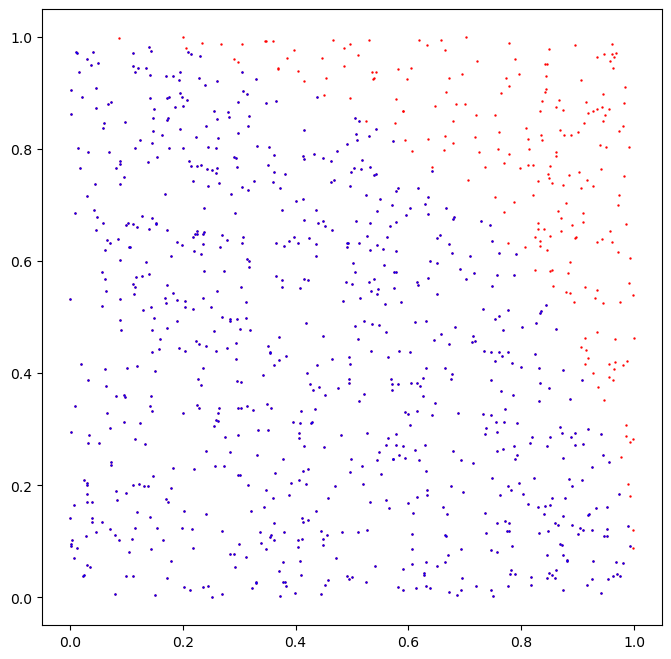

In [103]:
# generate random points within a box in the first quadrant and count the number 
import numpy as np
import matplotlib.pyplot as plt
n = 1000
x = np.random.rand(n, 2) # generate array n x 2 with random numbers between 0 and 1
inside = x[np.sqrt(x[:,0]**2+x[:,1]**2) < 1] # keep the points which fall within the unit circle x^2 + y^2 < 1
estimate = 4 * len(inside)/len(x) # divide # of points in circle by # of points in box, multiply by 4 to represent 4 quadrants
print('Estimate of pi: {}'.format(estimate))
plt.figure(figsize = (8, 8))
plt.scatter(x[:, 0], x[:, 1], s= .5, c = 'red') # scatter plot of all points
plt.scatter(inside[:, 0], inside[:, 1], s = .5, c = 'blue') # scatter plot of points that fall within circle-- blue overwrites the red
plt.show()

### Task (Main Course)
Write a Monte Carlo simulation for flipping a coin 5000 times to estimate $P(tails)$.  If you run it several times, do you always get the same probability?  Explain.  Add the line np.random.seed(1) to your code, just under the module imports.  Run your code several times and revisit the question.

If you increase the coin flips to 50000, and then to 500,000, what happens?

### Solution


In [102]:
import numpy as np
import random

# coin flip function
# 0 is heads
# 1 is tails

def coin_flip():
    return random.randint(0,1)

# Monte Carlo simulation
def monte_carlo(n):
    results = 0 # this will hold the total # of tails
    for i in range(n):
        flip_result = coin_flip() # flip the coin
        results = results + flip_result
        
    return results/n

# call function 
prob_tail = monte_carlo(5000)

print('Probability of tails is ', prob_tail)


Probability of tails is  0.495


### Other Useful Numpy Tools

In [2]:
# matrix multiplication
A = np.array([[1,2], [3,4]]) # 2 x 2 matrix with 1 and 2 in the first row and 3 and 4 in the second row
B = np.array([[5,6], [7,8]])
C = np.dot(A,B) # matrix multiplication
print(C)

[[19 22]
 [43 50]]


In [5]:
# statistical function
A = np.array([1, 2, 3, 4, 5, 6, 7, 9, 10])
mean = np.mean(A)
print('Mean of A is ', mean)
sd = np.std(A)
print('Standard deviation of A is ', sd)
median = np.median(A)
print('Median of A is ', median)

Mean of A is  5.222222222222222
Standard deviation of A is  2.8974232912011773
Median of A is  5.0


In [6]:
# unique values-- similar to set ({})
np.array([1, 2, 3, 2, 1, 3, 4, 4, 5, 5, 5])
B = np.unique(A)
print(B)

[ 1  2  3  4  5  6  7  9 10]


In [8]:
# masking
A = np.array([1, 2, 3, 4, 5, 6, 7, 8])
mask = A > 2
B = A[mask]
print(B)

[3 4 5 6 7 8]


In [10]:
# masking -- note that it changes dimensions
A = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
mask = A > 2
B = A[mask]
print(B)
print(A)

[3 4 5 6 7 8]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


### Linear Algebra (Optional)
Numpy has a number of linear algebra functions.  Common examples include finding eigenvalues, eigenvectors, the inverse of a matrix, the determinant, the rank and solving systems of linear equations.  More documentation can be found here: https://numpy.org/doc/stable/reference/routines.linalg.html.  This will not be emphasized in this class, but the Data Science major requires linear algebra, so being aware of this module might be helpful to you both in a linear algebra course and for applications of linear algebra in data science.

In [17]:
# linear algebra
A = np.array([[1, 2], [4,5]])
inv = np.linalg.inv(A) # returns inverse of matrix
print(inv)
evalsvecs = np.linalg.eig(A) # returns evals and then evecs
print(evalsvecs)
evals = np.linalg.eigvals(A) # returns just evals
print(evals)
det = np.linalg.det(A) # returns determinant
print(det)
rank = np.linalg.matrix_rank(A)
print(rank)

[[-1.66666667  0.66666667]
 [ 1.33333333 -0.33333333]]
(array([-0.46410162,  6.46410162]), array([[-0.80689822, -0.34372377],
       [ 0.59069049, -0.9390708 ]]))
[-0.46410162  6.46410162]
-2.9999999999999996
2


In [18]:
# solve Ax = b for x
A = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])
x = np.linalg.solve(A, b)
x

array([-1.,  1.])

## Image Manipulation As Array Operations

We can open an image from our working directory and display it.  For this demo, we will use the PIL module as well as Matplotlib, which is a comprehensive library for creating visualizations in Python.  A future lab will cover Matplotlib in greater detail.  For this lab, we will reuse the same few commands to display a figure, resize a figure, add a plot title, and create subplots.  Further documentation can be found here: https://matplotlib.org.

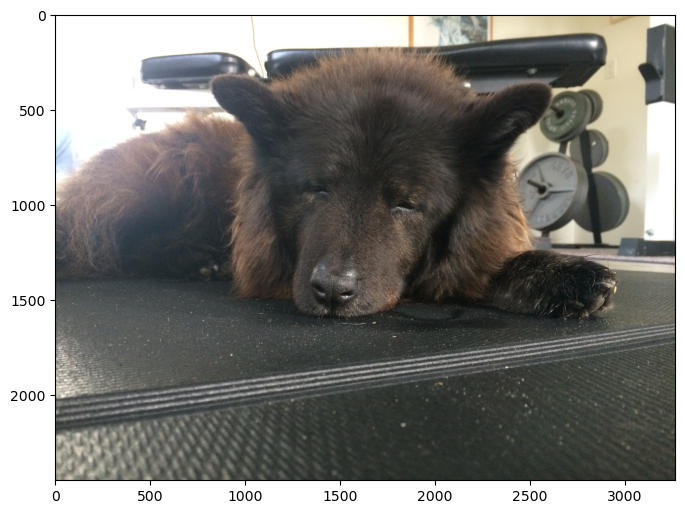

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

img = np.array(Image.open('IMG_2518.JPG'))
plt.figure(figsize = (8,8))
plt.imshow(img)
plt.show() 

In [29]:
print('Number of dims: ', img.ndim)
print('Image shape: ', img.shape)

Number of dims:  3
Image shape:  (2448, 3264, 3)


This tells us that the information creating the image is stored in a 3D ndarray with 2448 rows, 3264 columns, and 3 color channels.

### Negative of an Image
Each pixel contains three values for the red, green, and blue color. Each value is in the range 0-255.  The values combined make up the resultant color of the pixel.  To negatively transform an image, we subtract the value of the pixel from 255 (maximum possible value of the pixel).

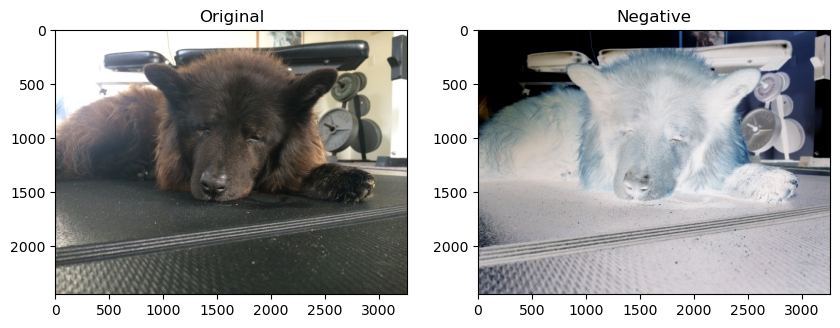

In [48]:
img = np.array(Image.open('IMG_2518.JPG'))

fig = plt.figure(figsize = (10,10))

fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

img = 255 - img # transform image
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title('Negative')
plt.show()

### Rotation


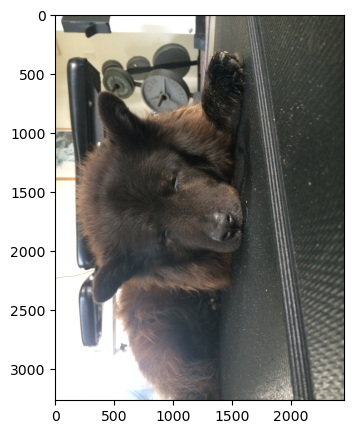

In [46]:
degrees = 90
img = np.array(Image.open('IMG_2518.JPG'))
img_rot = np.rot90(img) # rotate array 90 degree counterclockwise
plt.figure(figsize = (5,5))
plt.imshow(img_rot)
plt.show()

### Grayscale as a Weighted Mean
In digital photography, a grayscale image is one in which the value of each pixel is a single sample representing only an amount of light; that is, it carries only intensity information. Grayscale images, a kind of black-and-white or gray monochrome, are composed exclusively of shades of gray. The contrast ranges from black at the weakest intensity to white at the strongest.
The formula used gives a weight to each color channel: $Y = 0.299R + 0.587G + 0.114B$.

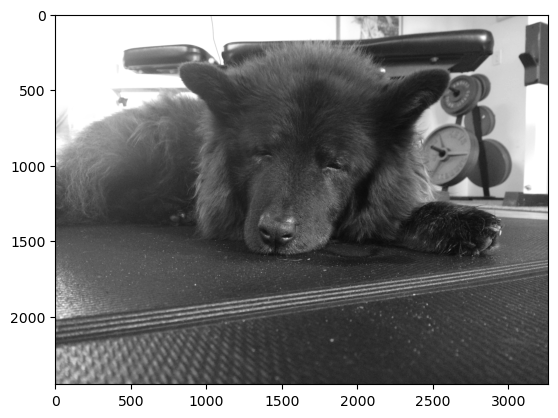

In [174]:
img = np.array(Image.open('IMG_2518.JPG'))
gray = lambda pic : np.dot(pic[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray(img)  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.show()

### Split into Color Channels

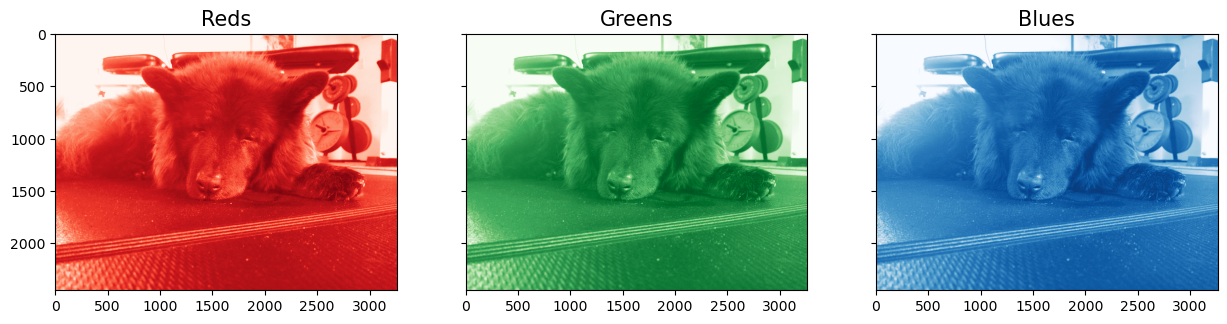

In [49]:
# function to split on color channels
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True) # sharey = True means y-axis shared among plots
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i]) # iterate along the color dimension
        ax[i].set_title(rgb_list[i], fontsize = 15) # give specific color title
img = np.array(Image.open('IMG_2518.JPG'))        
rgb_splitter(img) # call function on image

### Array Slicing to Crop an Image


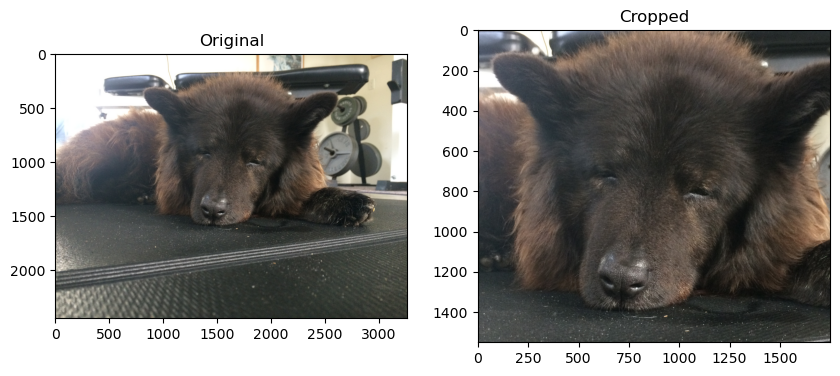

In [55]:
img = np.array(Image.open('IMG_2518.JPG'))
fig = plt.figure(figsize = (10, 10))

fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Original')

img_crop = img[200:1750, 750:2500, :] # array slicing

fig.add_subplot(1, 2, 2)
plt.imshow(img_crop)
plt.title('Cropped')

plt.show()

### Shadows and Highlights 
These effects (which you can apply using your cell phone editor) have an impact on the intensity of image pixels within specific ranges.
We are using logical indexing and finding pixels with an intensity above a threshold and then amplifying them.

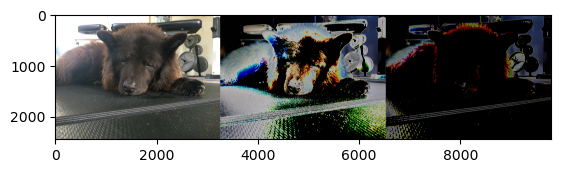

In [175]:
img = np.array(Image.open('IMG_2518.JPG'))
img_64 = np.where(img > 64, img, 0) * 255
img_128 = np.where(img > 128, img, 0) * 255

img_all = np.concatenate((img, img_64, img_128), axis = 1)
plt.imshow(img_all)
plt.show()

### Blending Images
We can combine images, and give each a weight to determine how much of it comes through.  We will use an image from a local Humboldt beach and combine it with our dog photo.

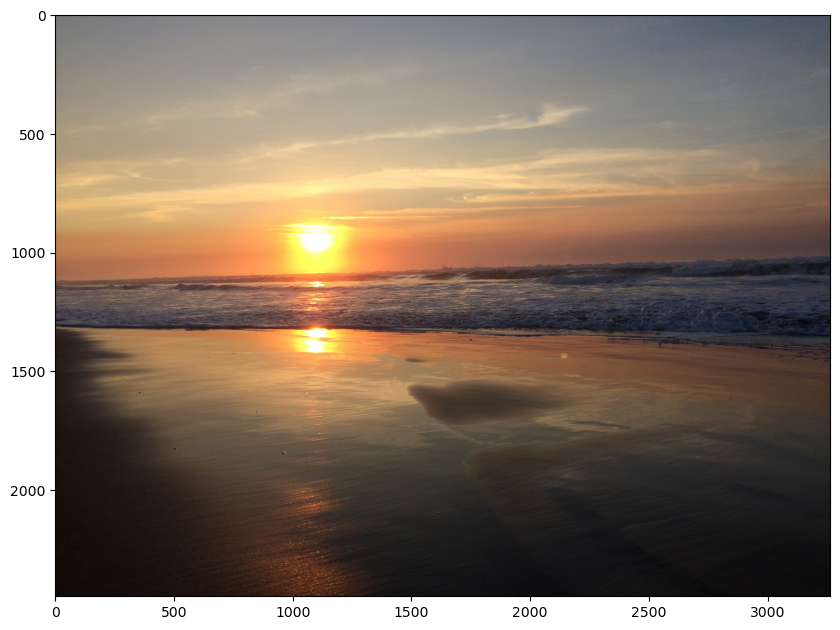

In [73]:
beach_img = np.array(Image.open('IMG_4499.JPG'))
plt.figure(figsize = (10, 10))
plt.imshow(beach_img)
plt.show()

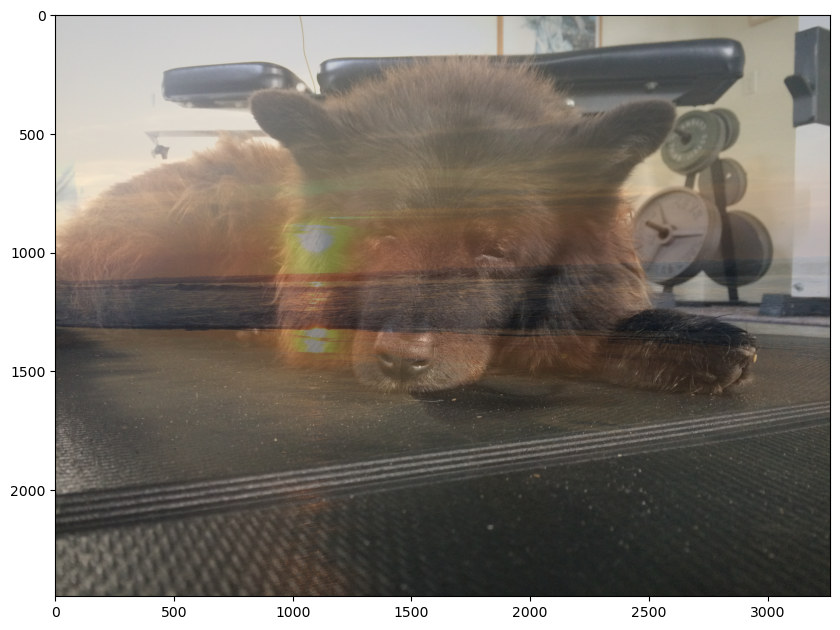

In [74]:
img = np.array(Image.open('IMG_2518.JPG'))
beach_img = np.array(Image.open('IMG_4499.JPG'))
# 60% dog photo and 40% beach photo
blend = (img * .6 + beach_img * .4).astype(np.uint8) # convert back to unsigned integer after multiplying by decimals

plt.figure(figsize = (10, 10))
plt.imshow(blend)
plt.show()

### Task (Dessert)
- choose an image for this task (a photo you took, a photo from the web, etc.).
- display the image.
- display its negative.
- display the image rotated 90 degrees clockwise (different than example).
- display the image as a grayscale image.
- display the image in each of its color channels.
- crop part of the image and display it.  (Choose a cropping that is visually interesting based on your image and experimentation.)
- chose one other image and blend the two images.  Play with weights until you are happy with the results.


### References
- Numerical Python: Scientific Computation and Data Science Applications wtih Numpy, SciPy and Matplotlib by Robert Johansson
- Data Science with Python: Probabilistic Modeling.  https://www.cdslab.org/python/notes/probabilistic-modeling/random-numbers/random-numbers.html
- Image Processing by Data Carpentries: https://datacarpentry.org/image-processing/aio/index.html